In [1]:
import funciones as fun
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
from empiricaldist import Cdf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
import pygad
import random
import math
import matplotlib.pyplot as plt

In [2]:
with open('Modelos/Comp_a/RandomForestRegressor_modelo.pkl', 'rb') as archivo:
    modelo_a = pickle.load(archivo)
with open('Modelos/Comp_b/RandomForestRegressor_modelo.pkl', 'rb') as archivo:
    modelo_b = pickle.load(archivo)
with open('Modelos/Comp_c/RandomForestRegressor_modelo.pkl', 'rb') as archivo:
    modelo_c = pickle.load(archivo)
with open('Modelos/Comp_d/RandomForestRegressor_modelo.pkl', 'rb') as archivo:
    modelo_d = pickle.load(archivo)

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
with open('Modelos/Comp_a/scaler_model.pkl', 'rb') as archivo:
    scaler_a = pickle.load(archivo)
with open('Modelos/Comp_b/scaler_model.pkl', 'rb') as archivo:
    scaler_b = pickle.load(archivo)
with open('Modelos/Comp_c/scaler_model.pkl', 'rb') as archivo:
    scaler_c = pickle.load(archivo)
with open('Modelos/Comp_d/scaler_model.pkl', 'rb') as archivo:
    scaler_d = pickle.load(archivo)

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
comp_a = pd.read_csv('Datos/Originales/Comp_A.csv')
comp_b = pd.read_csv('Datos/Originales/Comp_B.csv')
comp_c = pd.read_csv('Datos/Originales/Comp_C.csv')
comp_d = pd.read_csv('Datos/Originales/Comp_D.csv')

In [5]:
comp_a.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.775748,16.9,0.0,71.466562
1,0.776315,16.6,0.0,71.442768
2,0.776784,16.6,0.0,71.347653
3,0.777093,16.4,0.0,71.244807
4,0.777436,16.4,0.0,71.194101


In [6]:
presion_comp_a = comp_a['Presion'].median()
temp_comp_a = comp_a['Temperatura'].median()

In [7]:
comp_b.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.746369,13.7,25.883513,90.247441
1,0.746888,13.7,30.497513,94.649142
2,0.747145,13.6,32.975970,97.726040
3,0.747433,13.6,34.000000,99.546341
4,0.747617,13.5,34.000000,101.412499


In [8]:
presion_comp_b = comp_b['Presion'].median()
temp_comp_b = comp_b['Temperatura'].median()

In [9]:
comp_c.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.758687,12.7,0.000000,65.908308
1,0.756574,12.7,0.000000,66.551797
2,0.750645,13.1,0.000000,67.988530
3,0.745357,13.1,0.532897,68.881566
4,0.743977,13.5,4.425237,72.657725


In [10]:
presion_comp_c = comp_c['Presion'].median()
temp_comp_c = comp_c['Temperatura'].median()

In [11]:
comp_d.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.743207,12.1,43.480383,119.583697
1,0.744016,12.1,47.441743,122.414787
2,0.744196,12.8,49.432157,122.943571
3,0.744104,12.8,51.654600,123.847209
4,0.744064,13.7,53.971603,125.474319


In [12]:
presion_comp_d = comp_d['Presion'].median()
temp_comp_d = comp_d['Temperatura'].median()

In [13]:
condiciones_iniciales = [25, 25, 25, 25]

In [14]:
# Generamos la poblacion inicial
random.seed(42) #semilla para que en todas las ejecuciones la poblacion inicial sea la misma
poblacion_inicial = []
poblacion_inicial.append(condiciones_iniciales)
for _ in range(50):
    individuo = []
    for _ in range(4):
        gen = random.uniform(1, 90)
        individuo.append(gen)
    poblacion_inicial.append(individuo)

In [15]:
poblacion_inicial

[[25, 25, 25, 25],
 [57.908985062751654,
  3.2259572148173574,
  25.477609334851614,
  20.865755695245223],
 [66.54593806059711, 61.226254380639105, 80.40398152573124, 8.737556104018037],
 [38.55104195198907, 3.6519525299882605, 20.4587797575207, 45.976620641199254],
 [3.361701301863863, 18.696550911111714, 58.83971496237756, 49.49979177368628],
 [20.619215361622008,
  53.44464586495587,
  73.03931064432658,
  1.5783896113474305],
 [72.7179134131199, 63.13440615395219, 31.282295970101277, 14.837675483248558],
 [86.19196342640353, 30.956914515023783, 9.254380060833164, 9.607757538178298],
 [76.42699860492392, 54.7316167916533, 72.83441632141984, 65.94612901574979],
 [48.72430013946837, 87.60730299416399, 34.68955957154346, 50.131616183317206],
 [74.81701511851654, 56.0482579604179, 77.69191412765917, 52.384340927851824],
 [63.706893423128186,
  5.078370145353937,
  21.28294653298767,
  26.755528760587538],
 [8.101485946202846, 21.718388886131685, 9.98912721746589, 25.7396506767982],
 [5

In [16]:
objetivo = 200

Seleccion de parametros para el algoritmo genetico final

In [17]:
#definimos la funcion fitness
def fitness_func(ga_instance, solution, solution_idx):
    capacidad = np.array([100, 90, 95, 110])
    frecuencia_porcentaje = [numero / 100 for numero in solution]
    volumen_aire  = capacidad * frecuencia_porcentaje
    if sum(volumen_aire) >= objetivo:
        comp_a = pd.DataFrame({
        'Presion': [presion_comp_a],
        'Temperatura': [temp_comp_a],
        'Frecuencia': solution[0]
        })
        X = scaler_d.transform(comp_a)
        X = pd.DataFrame(X, columns=comp_a.columns)
        potencia_a = modelo_a.predict(X)
        comp_b = pd.DataFrame({
        'Presion': [presion_comp_b],
        'Temperatura': [temp_comp_b],
        'Frecuencia': solution[1]
        })
        X = scaler_d.transform(comp_b)
        X = pd.DataFrame(X, columns=comp_b.columns)
        potencia_b = modelo_b.predict(X)
        comp_c = pd.DataFrame({
        'Presion': [presion_comp_c],
        'Temperatura': [temp_comp_c],
        'Frecuencia': solution[2]
        })
        X = scaler_d.transform(comp_c)
        X = pd.DataFrame(X, columns=comp_c.columns)
        potencia_c = modelo_c.predict(X)
        comp_d = pd.DataFrame({
        'Presion': [presion_comp_d],
        'Temperatura': [temp_comp_d],
        'Frecuencia': solution[3]
        })
        X = scaler_d.transform(comp_d)
        X = pd.DataFrame(X, columns=comp_d.columns)
        potencia_d = modelo_d.predict(X)
        fitness = (potencia_a + potencia_b + potencia_c + potencia_d)
        penalizacion = sum(volumen_aire) - objetivo
        fitness = (fitness)+math.exp(penalizacion)
        for i in range(len(solution)):
            if solution[i] != condiciones_iniciales[i]:
                fitness +=3
        fitness = -fitness
        fitness = float(fitness[0])
    else:
        fitness = -10e99
    return fitness

In [18]:
num_generations = 30
num_parents_mating = len(poblacion_inicial)//2
num_genes = len(poblacion_inicial[0])
parent_selection_type = ['sss', 'rws', 'sus', 'rank', 'random', 'tournament']
crossover_type = ['single_point', 'two_points', 'uniform', 'scattered']
mutation_type = ['random', 'swap', 'inversion', 'scramble']
mutation_percent_genes = 1
mutation_probability = 0.1
keep_parents = 2
gene_space = range(1, 90)

In [19]:
def on_stop_todos(ga_instance, last_population_fitness):
    print(f"El algoritmo genético con los parametros {parent}, {crossover}, {mutation} ha finalizado.")
    print("Mejor solución encontrada:", ga_instance.best_solution())

In [72]:
resultados = []
for parent in parent_selection_type:
    for crossover in crossover_type:
        for mutation in mutation_type:
                for _ in range(4):
                    ga_instance = pygad.GA(fitness_func=fitness_func,
                       num_generations=num_generations, 
                       num_parents_mating=num_parents_mating,
                       num_genes=num_genes,
                       parent_selection_type=parent,
                       crossover_type=crossover,
                       gene_space=gene_space,
                       mutation_type= mutation,
                       mutation_percent_genes = mutation_percent_genes,
                       mutation_probability=mutation_probability,
                       initial_population=poblacion_inicial,
                       gene_type=float,
                       on_stop=on_stop_todos,
                       keep_parents=keep_parents)
                    ga_instance.run()
                    resultados.append((parent, crossover, mutation, ga_instance.best_solution()[1]))

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 84.        ,  6.        , 36.21123919]), -446.9025526750629, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, random ha finalizado.
Mejor solución encontrada: (array([65.8877506 , 30.        , 20.        , 81.58238116]), -450.8619937990149, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, random ha finalizado.
Mejor solución encontrada: (array([68.86346121,  4.        , 74.        , 52.38434093]), -452.87763480826084, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, random ha finalizado.
Mejor solución encontrada: (array([77.50755062, 40.        ,  5.        , 75.        ]), -444.37714715531865, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876,  8.7375561 , 48.72430014, 61.22625438]), -454.9619022241889, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, swap ha finalizado.
Mejor solución encontrada: (array([78.95091169,  8.7375561 , 89.65480284, 25.79051788]), -437.50508950633514, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, swap ha finalizado.
Mejor solución encontrada: (array([59.33404121, 29.00633139, 78.99671876, 36.21123919]), -461.3617660414249, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, swap ha finalizado.
Mejor solución encontrada: (array([59.33404121, 29.00633139, 78.99671876, 36.21123919]), -461.3617660414249, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139,  8.7375561 , 78.99671876]), -437.7057323854813, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([24.76102616, 82.2238777 ,  5.50236133, 87.60730299]), -443.5110931395664, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([85.88961755, 24.76102616, 56.04825796, 36.21123919]), -454.02126558890586, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([87.60730299, 40.43863631, 34.68955957, 40.43863631]), -457.36460863907274, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([75.40645507, 36.21123919,  5.50236133, 80.40398153]), -444.6800096340171, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([82.2238777 , 24.76102616, 59.33404121, 36.21123919]), -455.0886124514371, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([83.17063834, 16.90001737, 16.90001737, 78.47615272]), -436.49823007136047, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([77.50755062, 21.37581876, 80.40398153, 24.44162552]), -444.31954040725316, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.        , 29.00633139, 59.33404121, 36.21123919]), -460.11830020330103, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 58.        , 36.21123919]), -457.48927003350144, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, random ha finalizado.
Mejor solución encontrada: (array([88., 29., 70., 18.]), -448.2874434542413, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, random ha finalizado.
Mejor solución encontrada: (array([72.        , 29.        , 79.        , 24.44162552]), -449.8864910491742, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, swap ha finalizado.
Mejor solución encontrada: (array([88.59070381, 29.00633139, 78.99671876,  9.75919053]), -442.6309441985218, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, swap ha finalizado.
Mejor solución encontrada: (array([59.33404121, 29.00633139, 78.99671876, 36.21123919]), -461.36176604142486, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, swap ha finalizado.
Mejor solución encontrada: (array([80.40398153,  7.30630414, 77.50755062, 36.21123919]), -447.6031214555142, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([23.23277386,  5.50236133, 77.66007032, 89.93613969]), -442.51236539399594, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([78.95091169, 78.95091169, 24.44162552, 24.44162552]), -450.1716496368002, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 60.92944471, 36.21123919, 29.00633139]), -462.24180847215473, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([83.17063834, 23.23277386, 36.21123919, 56.04825796]), -452.36416393377544, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([23.23277386,  5.50236133, 77.66007032, 89.93613969]), -442.51236539399594, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([70.83112876, 40.43863631, 29.00633139, 59.33404121]), -460.1783408657504, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, random ha finalizado.
Mejor solución encontrada: (array([76.        , 16.90001737, 34.68955957, 69.        ]), -451.7305632917886, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, random ha finalizado.
Mejor solución encontrada: (array([78.99671876,  1.        , 76.        , 44.        ]), -451.6845177298645, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, random ha finalizado.
Mejor solución encontrada: (array([77.50755062, 12.77575454, 22.        , 82.        ]), -437.4585773909323, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, random ha finalizado.
Mejor solución encontrada: (array([89.        ,  7.        , 69.        , 36.21123919]), -447.0763362434295, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, swap ha finalizado.
Mejor solución encontrada: (array([59.33404121, 29.00633139, 78.99671876, 36.21123919]), -461.36176604142486, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, swap ha finalizado.
Mejor solución encontrada: (array([82.2238777 , 16.90001737, 74.81701512, 29.00633139]), -447.0161464251506, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, swap ha finalizado.
Mejor solución encontrada: (array([59.33404121, 29.00633139, 78.99671876, 36.21123919]), -461.36176604142486, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 36.21123919, 23.23277386, 61.22625438]), -454.0156108514835, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.95091169, 78.95091169, 24.44162552, 24.44162552]), -450.1716496368002, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([24.76102616, 87.60730299,  8.62315723, 80.90623664]), -448.38290501085953, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([84.36225831, 24.76102616, 34.68955957, 55.2126595 ]), -448.83387664415505, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([79.14285433, 24.38400316, 16.90001737, 76.4269986 ]), -441.33092320641384, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([43.06772134, 29.00633139, 40.43863631, 84.36225831]), -458.18915848960387, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([77.50755062, 24.76102616, 78.95091169, 24.44162552]), -450.4548657630144, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, random ha finalizado.
Mejor solución encontrada: (array([77., 25., 61., 39.]), -456.5902606964267, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, random ha finalizado.
Mejor solución encontrada: (array([65.8877506, 20.       , 30.       , 81.       ]), -449.9554862302695, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, random ha finalizado.
Mejor solución encontrada: (array([72.        ,  7.30630414, 40.        , 77.        ]), -451.7461076299591, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, random ha finalizado.
Mejor solución encontrada: (array([78.        , 29.00633139, 59.33404121, 36.21123919]), -460.11830020330103, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, swap ha finalizado.
Mejor solución encontrada: (array([59.33404121, 36.21123919, 80.40398153, 29.00633139]), -459.2844955144901, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.95091169, 24.38400316,  8.62315723, 83.17063834]), -432.34536631059166, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, swap ha finalizado.
Mejor solución encontrada: (array([89.93613969,  5.50236133, 23.23277386, 77.66007032]), -440.8777263467522, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 24.38400316, 48.72430014, 49.00473368]), -459.74388230733035, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([77.50755062, 24.76102616, 78.95091169, 24.44162552]), -450.4548657630144, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([84.26076741, 16.90001737, 12.77575454, 80.40398153]), -432.03375188066707, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([77.50755062, 29.00633139, 77.50755062, 21.37581876]), -451.0567455784741, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([77.69191413, 24.38400316, 16.90001737, 78.47615272]), -445.6871786145492, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([80.90623664,  8.62315723, 36.21123919, 70.83112876]), -449.3340116728996, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sss, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([89.93613969, 34.68955957, 24.44162552, 50.96176394]), -444.33240429977707, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, random ha finalizado.
Mejor solución encontrada: (array([79.        , 20.51954756, 74.        , 30.        ]), -450.6977797749547, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, random ha finalizado.
Mejor solución encontrada: (array([70.        ,  3.65195253, 35.        , 87.        ]), -445.9717325492172, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, random ha finalizado.
Mejor solución encontrada: (array([12.        , 23.        , 78.        , 84.91896458]), -443.92336527361596, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, swap ha finalizado.
Mejor solución encontrada: (array([57.57591554, 83.68977685, 25.        , 39.69410731]), -459.2649370092865, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, swap ha finalizado.
Mejor solución encontrada: (array([69.15926421, 68.69359271,  7.15991414, 56.84269771]), -460.0972789580989, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, swap ha finalizado.
Mejor solución encontrada: (array([79.20624713, 29.84988907,  2.73343007, 83.68977685]), -433.36322792239787, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, swap ha finalizado.
Mejor solución encontrada: (array([10.7587726 , 83.68977685, 25.        , 83.68977685]), -452.552049826255, 46)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([63.70689342, 29.07532128, 25.        , 78.64654066]), -445.4372939465165, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([25.47760933, 24.82893796, 63.13440615, 84.26076741]), -458.5921889027269, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([38.65927668, 19.85004028, 48.9973519 , 89.78084698]), -455.630642704521, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([79.20624713, 25.        , 75.01823211, 25.        ]), -441.16750472192734, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, random ha finalizado.
Mejor solución encontrada: (array([17., 25., 84., 75.]), -452.7791907526462, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, random ha finalizado.
Mejor solución encontrada: (array([89., 61., 13., 40.]), -450.1333955948879, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, swap ha finalizado.
Mejor solución encontrada: (array([72.8672328 , 30.95691452, 86.19196343, 17.94648238]), -458.1654135867094, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([84.26076741, 79.20624713,  6.65396585, 34.9641165 ]), -449.3965245848256, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([38.55104195, 40.92660576, 34.9641165 , 84.26076741]), -459.66259499010084, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([57.57591554, 21.4802112 , 33.47006393, 83.68977685]), -448.4894226041151, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([83.68977685, 24.82893796,  3.22595721, 83.68977685]), -428.35728162027124, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([34.9641165 ,  7.31838465, 77.68885574, 77.68885574]), -454.3227760729878, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([89.56829274, 24.57433482, 33.94610607, 51.82283531]), -447.1989955842162, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([76.0138209 ,  9.62684247, 76.0138209 , 39.36355523]), -451.4120566058482, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, random ha finalizado.
Mejor solución encontrada: (array([82., 23., 76., 23.]), -445.82260101846026, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, random ha finalizado.
Mejor solución encontrada: (array([79.        ,  3.65195253, 28.36875716, 84.        ]), -435.86103808515065, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, random ha finalizado.
Mejor solución encontrada: (array([77.        , 19.85004028,  9.98912722, 89.        ]), -440.07317661680327, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, random ha finalizado.
Mejor solución encontrada: (array([76.        , 10.        , 21.28294653, 88.        ]), -439.95063748296275, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, swap ha finalizado.
Mejor solución encontrada: (array([86.19196343,  5.07837015, 38.69849745, 65.96386515]), -445.9880436446954, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([20.51954756, 25.        , 89.78084698, 65.96386515]), -450.50584991192835, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([71.49506343,  6.65396585, 34.9641165 , 83.68977685]), -457.5134377981248, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([20.06707586, 84.26076741, 81.58238116, 24.82893796]), -461.7732852042928, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([73.03931064,  3.85692171, 73.03931064, 49.93251982]), -453.65529902425874, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, random ha finalizado.
Mejor solución encontrada: (array([83.        , 12.77575454, 21.28294653, 78.64654066]), -438.3446531790959, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, random ha finalizado.
Mejor solución encontrada: (array([74., 31., 16., 76.]), -447.20482237477046, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, random ha finalizado.
Mejor solución encontrada: (array([81., 32.,  3., 80.]), -436.41076347241386, 24)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, random ha finalizado.
Mejor solución encontrada: (array([76.0138209 , 24.82893796,  9.98912722, 84.91896458]), -436.6142023252733, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, swap ha finalizado.
Mejor solución encontrada: (array([69.15926421,  3.22595721, 55.19834882, 68.69359271]), -453.5862276477708, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, swap ha finalizado.
Mejor solución encontrada: (array([71.49506343, 25.73965068, 86.19196343, 21.71838889]), -445.7074875893774, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, swap ha finalizado.
Mejor solución encontrada: (array([71.49506343, 38.57223705,  2.73343007, 83.68977685]), -443.832502784754, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([79.20624713, 75.01823211, 25.        , 28.36875716]), -455.30457445738784, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([78.64654066, 20.45877976, 78.64654066, 25.73965068]), -445.5164329806289, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([57.1681632 , 41.83781488, 17.92859285, 81.58238116]), -457.98480117768054, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([36.54664496, 24.74744191, 89.78084698, 51.82283531]), -457.7213567051838, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([29.07532128,  1.05089876, 83.68977685, 83.68977685]), -445.6461896259796, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([76.0138209 , 25.47760933, 21.3852784 , 76.0138209 ]), -460.9223834817012, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rws, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, random ha finalizado.
Mejor solución encontrada: (array([89., 74., 14., 29.]), -446.2010838931926, 31)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, random ha finalizado.
Mejor solución encontrada: (array([71.49506343, 38.57223705,  2.73343007, 83.68977685]), -443.83250278475407, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, random ha finalizado.
Mejor solución encontrada: (array([75., 19., 68., 40.]), -459.73884061117053, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, random ha finalizado.
Mejor solución encontrada: (array([80., 24., 19., 75.]), -448.3493048943777, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, swap ha finalizado.
Mejor solución encontrada: (array([29.07532128, 25.        , 89.78084698, 57.86650504]), -451.5425087042368, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, swap ha finalizado.
Mejor solución encontrada: (array([43.30013165, 53.44464586, 20.45877976, 81.58238116]), -461.6003061830143, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([65.14424192, 20.06707586, 81.58238116, 36.54664496]), -457.9436395194338, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([57.1681632 ,  7.31838465, 84.26076741, 51.82283531]), -456.6860421092503, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([57.1681632 ,  7.31838465, 84.26076741, 51.82283531]), -456.6860421092503, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([89.56829274, 18.90244464, 28.74274993, 60.53902227]), -441.0247854820602, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, random ha finalizado.
Mejor solución encontrada: (array([74.       , 83.       , 14.       , 34.9641165]), -456.00802143044064, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, random ha finalizado.
Mejor solución encontrada: (array([57.57591554, 34.        , 19.77747308, 84.91896458]), -450.0977441552714, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, random ha finalizado.
Mejor solución encontrada: (array([86.19196343, 24.82893796, 77.68885574, 17.94648238]), -449.6379178380512, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, random ha finalizado.
Mejor solución encontrada: (array([21.        , 33.        , 81.        , 65.96386515]), -462.29932233226975, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, swap ha finalizado.
Mejor solución encontrada: (array([38.65927668, 83.68977685,  1.05089876, 78.64654066]), -453.2710692987527, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([57.1681632 ,  7.31838465, 84.26076741, 51.82283531]), -456.68604210925025, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([76.0138209 , 12.77575454, 24.74744191, 81.58238116]), -439.47880885719104, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, random ha finalizado.
Mejor solución encontrada: (array([82.39473549, 84.        , 21.4802112 , 19.64612574]), -445.86723207162373, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, random ha finalizado.
Mejor solución encontrada: (array([87., 17., 19., 73.]), -437.357043402814, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, random ha finalizado.
Mejor solución encontrada: (array([20.06707586, 13.        , 84.        , 81.58238116]), -449.96543137743026, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, random ha finalizado.
Mejor solución encontrada: (array([69., 14., 32., 81.]), -444.8626056595464, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, swap ha finalizado.
Mejor solución encontrada: (array([55.19834882, 29.84988907, 27.56158644, 83.68977685]), -448.4264915876869, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, swap ha finalizado.
Mejor solución encontrada: (array([77.68885574, 31.19793188, 31.08961503, 60.53902227]), -459.2362233277785, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, swap ha finalizado.
Mejor solución encontrada: (array([55.19834882, 57.86650504,  1.05089876, 83.68977685]), -450.57193668170976, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([83.68977685, 17.92859285, 39.99090747, 57.90898506]), -457.18018008502395, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([69.15926421, 31.08961503, 29.84988907, 69.15926421]), -459.02329906046043, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([82.39473549, 70.06399213, 18.69655091, 34.77153432]), -460.37361899431147, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([65.89228502,  8.10148595, 39.99090747, 82.39473549]), -453.8516428003659, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([84.91896458, 77.50755062, 39.99090747,  7.30630414]), -459.2079549505862, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, random ha finalizado.
Mejor solución encontrada: (array([84., 15., 17., 81.]), -448.3017553205884, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, random ha finalizado.
Mejor solución encontrada: (array([65.        , 19.85004028, 28.36875716, 83.68977685]), -449.6699595662609, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, random ha finalizado.
Mejor solución encontrada: (array([77., 31., 18., 73.]), -455.2798479532148, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, random ha finalizado.
Mejor solución encontrada: (array([29.        ,  3.65195253, 76.        , 88.        ]), -445.6706598513015, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, swap ha finalizado.
Mejor solución encontrada: (array([57.90898506,  3.22595721, 77.68885574, 60.53902227]), -457.6413683914512, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, swap ha finalizado.
Mejor solución encontrada: (array([79.20624713, 14.6026949 , 28.36875716, 75.01823211]), -448.459764078399, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([81.58238116,  9.62684247, 23.13041372, 81.58238116]), -440.64857427767544, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([76.0138209 , 24.82893796, 84.91896458, 19.77747308]), -445.14964952293957, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([49.93251982, 24.59003998, 38.65927668, 84.26076741]), -459.41359218888687, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([89.56829274, 36.83329411,  9.60775754, 63.13440615]), -443.21551625228443, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992244, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros sus, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([86.19196343, 53.44464586, 58.83971496,  9.25438006]), -460.8105953520585, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, random ha finalizado.
Mejor solución encontrada: (array([29.07532128,  5.50236133, 79.        , 83.        ]), -447.4466591134464, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, random ha finalizado.
Mejor solución encontrada: (array([78.        , 21.71838889, 21.        , 76.        ]), -443.10997228323515, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, random ha finalizado.
Mejor solución encontrada: (array([77.        , 20.        , 17.        , 81.58238116]), -437.90892675789667, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, swap ha finalizado.
Mejor solución encontrada: (array([82.39473549, 63.13440615, 24.57433482, 34.9641165 ]), -459.55383763262176, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, swap ha finalizado.
Mejor solución encontrada: (array([57.90898506,  6.15533982, 57.90898506, 75.01823211]), -457.8668856848267, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, swap ha finalizado.
Mejor solución encontrada: (array([77.50755062,  1.57838961, 57.57591554, 60.53902227]), -449.6167148244075, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, swap ha finalizado.
Mejor solución encontrada: (array([72.71791341,  1.57838961, 73.03931064, 53.44464586]), -460.0511595096446, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([70.06399213,  3.65195253, 45.97662064, 76.0138209 ]), -450.4709569856522, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([76.0138209 ,  3.65195253, 55.19834882, 63.13440615]), -454.8985751825567, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992244, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899224, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([86.19196343, 30.95691452, 81.58238116,  9.25438006]), -448.6223197279973, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([28.74274993, 20.06707586, 58.83914713, 89.56829274]), -454.5779712140668, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([72.71791341, 31.19793188, 77.68885574, 23.13041372]), -452.3936440666206, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, random ha finalizado.
Mejor solución encontrada: (array([27., 65., 18., 89.]), -453.47442534680016, 32)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, random ha finalizado.
Mejor solución encontrada: (array([28.        , 77.        ,  9.98912722, 86.        ]), -456.4599025381188, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, random ha finalizado.
Mejor solución encontrada: (array([68.        ,  3.65195253, 84.        , 45.97662064]), -455.78045578970523, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, random ha finalizado.
Mejor solución encontrada: (array([ 7.31838465, 20.51954756, 89.78084698, 81.58238116]), -445.11254681329353, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.95091169,  7.30630414, 22.18241246, 85.88961755]), -433.63963718923446, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, swap ha finalizado.
Mejor solución encontrada: (array([89.78084698,  3.85692171, 89.78084698, 20.51954756]), -428.9423220866212, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([57.57591554, 19.77747308, 33.47006393, 84.91896458]), -447.42180050477117, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([65.14424192, 38.57223705,  5.19335741, 88.59070381]), -452.4223574000972, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([57.90898506,  3.22595721, 76.0138209 , 61.67222284]), -458.79041282932405, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([82.39473549, 38.69849745, 14.83767548, 63.13440615]), -451.7231488226628, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([72.71791341, 25.        , 80.90623664, 27.56158644]), -455.5318969010813, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([20.06707586, 12.77575454, 77.6093935 , 87.42597561]), -450.26490602432585, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, random ha finalizado.
Mejor solución encontrada: (array([35., 89., 84.,  5.]), -458.2151881844411, 9)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, random ha finalizado.
Mejor solución encontrada: (array([10.        , 29.84988907, 82.2238777 , 78.47615272]), -455.96542200215055, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, random ha finalizado.
Mejor solución encontrada: (array([88., 34.,  2., 73.]), -439.1688981980924, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899224, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, swap ha finalizado.
Mejor solución encontrada: (array([89.65480284, 25.        , 18.90244464, 65.89228502]), -446.57916206088277, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([89.78084698, 20.51954756,  1.05089876, 83.68977685]), -424.4132707072404, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([33.47006393, 18.90244464, 89.56829274, 58.83914713]), -456.6626141472385, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([ 1.05089876, 29.84988907, 86.19196343, 83.68977685]), -453.3263699977917, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.46220118992227, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([73.03931064, 36.83329411, 14.83767548, 73.03931064]), -447.45586430140077, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([29.07532128, 19.77747308, 63.13440615, 84.91896458]), -455.5439454373758, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([42.56519546, 25.        , 54.73161679, 76.0138209 ]), -457.43169110511235, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, random ha finalizado.
Mejor solución encontrada: (array([76.        , 19.85004028, 28.36875716, 74.        ]), -454.03310406874647, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, random ha finalizado.
Mejor solución encontrada: (array([77.50755062, 20.        , 15.54282194, 83.        ]), -438.9708543228812, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, random ha finalizado.
Mejor solución encontrada: (array([10.        , 21.71838889, 89.78084698, 78.        ]), -445.881424018384, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, random ha finalizado.
Mejor solución encontrada: (array([85.        , 19.85004028, 26.        , 67.        ]), -442.97637518099197, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, swap ha finalizado.
Mejor solución encontrada: (array([43.06772134, 78.64654066,  1.05089876, 78.64654066]), -456.9800247597241, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, swap ha finalizado.
Mejor solución encontrada: (array([86.19196343, 14.83767548, 39.99090747, 56.84269771]), -451.48971665805914, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, swap ha finalizado.
Mejor solución encontrada: (array([89.56829274, 20.59934722, 36.54664496, 53.35947594]), -450.5435659099357, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([46.34784014, 22.18241246, 45.97662064, 82.39473549]), -457.32974374694817, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([20.06707586, 84.26076741, 12.77575454, 84.91896458]), -452.0659274112231, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([72.71791341, 31.28229597, 31.28229597, 63.13440615]), -453.96095516334634, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([70.06399213, 34.77153432, 23.13041372, 70.06399213]), -453.41081764489815, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([ 1.05089876, 87.42597561, 29.84988907, 83.68977685]), -452.5226903845219, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([28.74274993, 18.90244464, 58.83914713, 89.56829274]), -451.734737984062, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([36.54664496, 24.82893796, 46.34784014, 89.78084698]), -455.4302132801039, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros rank, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([75.01823211, 79.20624713, 28.36875716, 25.79051788]), -459.3526427459757, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, random ha finalizado.
Mejor solución encontrada: (array([71.49506343,  3.        , 31.        , 89.        ]), -435.060055444141, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, random ha finalizado.
Mejor solución encontrada: (array([82.39473549, 21.        , 22.        , 72.        ]), -444.13226967947884, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, random ha finalizado.
Mejor solución encontrada: (array([82.        , 30.95691452, 86.        ,  8.        ]), -443.74255142536623, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, random ha finalizado.
Mejor solución encontrada: (array([65., 39., 19., 75.]), -458.0321545503137, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, swap ha finalizado.
Mejor solución encontrada: (array([76.0138209 , 20.51954756, 78.99671876, 29.00633139]), -452.258049793401, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, swap ha finalizado.
Mejor solución encontrada: (array([82.2238777, 25.       , 10.7587726, 77.6093935]), -431.70151929617805, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, swap ha finalizado.
Mejor solución encontrada: (array([89.56829274, 78.47615272, 20.06707586, 20.59934722]), -450.93728315859636, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, swap ha finalizado.
Mejor solución encontrada: (array([89.56829274, 12.77575454, 89.56829274, 12.77575454]), -432.5863494425873, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([82.39473549, 33.94610607, 24.44162552, 58.67514929]), -451.9746855858955, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([88.59070381,  9.75919053,  6.15533982, 88.59070381]), -419.8295864685172, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([89.56829274, 89.56829274, 28.74274993,  3.3617013 ]), -442.70016242173745, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([83.17063834, 68.69359271, 19.64612574, 33.94610607]), -454.9592499138532, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([65.14424192,  9.09093768, 30.95691452, 89.06757821]), -440.20048176310536, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([85.88961755, 10.92814345, 10.92814345, 85.88961755]), -426.22700926507076, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([66.54593806, 24.38400316, 83.68977685, 29.84988907]), -450.5300016302485, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, random ha finalizado.
Mejor solución encontrada: (array([18.90244464,  6.        , 89.56829274, 83.        ]), -436.5658267312064, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, random ha finalizado.
Mejor solución encontrada: (array([88.        , 36.        , 24.        , 51.82283531]), -446.4967143123692, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, random ha finalizado.
Mejor solución encontrada: (array([87.        , 30.95691452, 12.        , 68.        ]), -442.8675804729534, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, random ha finalizado.
Mejor solución encontrada: (array([84., 37.,  6., 71.]), -440.4102854617465, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, swap ha finalizado.
Mejor solución encontrada: (array([89.93613969, 21.71838889,  8.10148595, 75.40645507]), -428.2677654694907, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, swap ha finalizado.
Mejor solución encontrada: (array([89.56829274,  3.22595721, 89.56829274, 20.998063  ]), -428.18762165108393, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, swap ha finalizado.
Mejor solución encontrada: (array([ 6.65396585, 25.79051788, 89.65480284, 77.6093935 ]), -446.96724704735385, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, swap ha finalizado.
Mejor solución encontrada: (array([87.42597561,  9.75919053, 10.7587726 , 85.27850063]), -424.6708698075824, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([86.19196343, 61.67222284,  5.19335741, 49.00473368]), -453.1296724971958, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([88.59070381, 18.69655091,  7.15991414, 81.58238116]), -433.7306030512444, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([84.91896458, 89.56829274,  3.85692171, 28.74274993]), -437.2894798328977, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([84.26076741, 34.77153432, 84.26076741,  5.50236133]), -451.2342459934634, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([86.19196343,  5.50236133, 80.40398153, 29.84988907]), -438.63724361401256, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 81.58238116, 16.23133969]), -447.4235207864811, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([80.40398153,  9.60775754, 86.19196343, 28.74274993]), -451.1388195986735, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([38.57223705, 21.4802112 , 49.93251982, 87.60730299]), -458.1004975087836, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, random ha finalizado.
Mejor solución encontrada: (array([75.        , 32.        , 10.92814345, 80.        ]), -450.53129091133536, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, random ha finalizado.
Mejor solución encontrada: (array([20.61921536, 16.        , 77.69191413, 83.        ]), -449.936558061127, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, random ha finalizado.
Mejor solución encontrada: (array([82.39473549,  4.        , 28.        , 80.        ]), -432.8329499576605, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, random ha finalizado.
Mejor solución encontrada: (array([85., 16., 12., 83.]), -437.466066099968, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, swap ha finalizado.
Mejor solución encontrada: (array([84.26076741, 12.77575454, 20.06707586, 77.6093935 ]), -435.51397159221847, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, swap ha finalizado.
Mejor solución encontrada: (array([65.8877506 , 24.82893796, 19.77747308, 84.91896458]), -438.54812308674224, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, swap ha finalizado.
Mejor solución encontrada: (array([89.93613969, 84.91896458,  9.09093768, 24.82893796]), -448.25936964080284, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139,  9.25438006, 78.47615272]), -439.4485965255532, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([89.06757821, 39.99090747, 25.        , 47.06424985]), -447.2418470169272, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([68.86346121, 36.21123919, 22.94984818, 70.2977566 ]), -453.5971985061508, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([76.4269986 ,  2.02181095, 89.78084698, 33.94610607]), -438.850533688219, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([65.8877506 , 26.75552876, 26.75552876, 77.50755062]), -447.5416159844612, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([68.86346121, 25.        , 21.71838889, 80.40398153]), -438.3782798916075, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([65.89228502, 34.77153432, 25.        , 72.8672328 ]), -453.28900709536276, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 36.21123919, 17.94648238, 65.8877506 ]), -450.9769600070903, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([65.14424192, 24.57433482, 20.45877976, 84.91896458]), -439.9809073747938, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, random ha finalizado.
Mejor solución encontrada: (array([82., 32., 13., 70.]), -442.6756952140284, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, random ha finalizado.
Mejor solución encontrada: (array([80.       , 14.       , 89.       , 20.8657557]), -438.1534072356254, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, random ha finalizado.
Mejor solución encontrada: (array([19.,  5., 87., 87.]), -439.49475241040176, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, random ha finalizado.
Mejor solución encontrada: (array([76., 18., 11., 89.]), -431.2105391585675, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876,  3.85692171, 28.36875716, 83.68977685]), -434.88590208945124, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, swap ha finalizado.
Mejor solución encontrada: (array([84.26076741, 12.77575454, 20.06707586, 77.66007032]), -435.58350324036303, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 21.37581876, 68.69359271]), -448.5063236437256, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.95091169, 85.27850063, 25.        , 18.69655091]), -445.12938894726665, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([89.06757821, 58.67514929,  5.50236133, 48.9973519 ]), -450.21163783719055, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([89.06757821,  8.10148595, 85.27850063, 20.998063  ]), -432.52156254047, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([79.14285433,  1.05089876, 34.9641165 , 79.14285433]), -438.26774080579355, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([89.65480284,  2.73343007, 33.47006393, 70.2977566 ]), -435.704695017422, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([85.88961755, 85.88961755, 10.7587726 , 24.76102616]), -441.18120670595357, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([76.0138209 , 20.51954756, 87.60730299, 20.51954756]), -443.01606576238385, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([83.17063834, 29.00633139, 18.69655091, 66.54593806]), -443.59365470219177, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros random, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([60.92944471,  7.31838465, 41.38140986, 85.88961755]), -449.71395680377435, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, random ha finalizado.
Mejor solución encontrada: (array([68.        , 29.00633139, 49.        , 54.        ]), -461.59793752964936, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, random ha finalizado.
Mejor solución encontrada: (array([77.        , 29.00633139, 85.        , 15.        ]), -446.8998330596681, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, random ha finalizado.
Mejor solución encontrada: (array([76.        , 85.        ,  8.62315723, 36.21123919]), -450.8880286447463, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, random ha finalizado.
Mejor solución encontrada: (array([35.        , 84.36225831,  8.62315723, 74.        ]), -456.64773986423415, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, swap ha finalizado.
Mejor solución encontrada: (array([76.4269986 , 24.44162552, 87.42597561, 16.90001737]), -441.55687969214574, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, swap ha finalizado.
Mejor solución encontrada: (array([88.59070381,  9.75919053, 88.59070381, 16.90001737]), -432.09919264705195, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, swap ha finalizado.
Mejor solución encontrada: (array([65.8877506 ,  5.50236133, 48.9973519 , 75.40645507]), -453.4991022317772, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, swap ha finalizado.
Mejor solución encontrada: (array([88.59070381, 24.44162552, 53.02815313, 36.21123919]), -450.90889559340997, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 23.23277386,  8.62315723, 85.27850063]), -437.1626361277096, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([84.36225831, 17.94648238,  8.7375561 , 84.36225831]), -432.09083039381363, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([75.01823211, 79.20624713, 28.36875716, 24.44162552]), -454.094925606885, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, inversion ha finalizado.
Mejor solución encontrada: (array([78.95091169, 29.00633139,  9.62684247, 78.95091169]), -441.0056066608813, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([85.88961755, 34.68955957, 78.95091169,  8.62315723]), -451.26388497823234, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([89.65480284, 29.00633139, 78.95091169,  9.75919053]), -445.56165066533896, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([78.64654066, 78.99671876, 24.59003998, 24.59003998]), -450.15867624000526, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, single_point, scramble ha finalizado.
Mejor solución encontrada: (array([ 9.75919053,  9.75919053, 88.59070381, 88.59070381]), -436.9809058340312, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 48.09117671,  6.        , 65.96386515]), -453.7559052854619, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.        , 29.00633139,  5.        , 84.        ]), -435.88970622878855, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.        , 29.        , 59.33404121, 36.        ]), -459.3592606987692, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, random ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 42.        , 50.        ]), -457.3708091431443, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, swap ha finalizado.
Mejor solución encontrada: (array([77.68885574, 31.19793188,  7.31838465, 81.58238116]), -449.2760738612365, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.95091169, 61.22625438, 41.38140986, 24.44162552]), -462.0822872665879, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 66.54593806, 29.00633139]), -456.2334533611717, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, swap ha finalizado.
Mejor solución encontrada: (array([59.33404121, 29.00633139, 78.99671876, 36.21123919]), -461.36176604142486, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([74.81701512, 21.37581876, 50.96176394, 52.38434093]), -460.9925080628191, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([59.33404121, 29.00633139, 78.99671876, 36.21123919]), -461.3617660414249, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139,  8.7375561 , 80.40398153]), -442.56125800394267, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, inversion ha finalizado.
Mejor solución encontrada: (array([75.40645507, 24.38400316, 21.4802112 , 75.40645507]), -443.68961700197855, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([85.88961755, 41.38140986, 48.20147683, 29.00633139]), -456.59038584930784, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 66.54593806, 29.00633139]), -456.2334533611717, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([85.88961755, 10.92814345, 10.92814345, 85.88961755]), -426.22700926507076, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, two_points, scramble ha finalizado.
Mejor solución encontrada: (array([70.83112876, 24.74744191, 29.00633139, 72.8672328 ]), -448.9853030260327, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, random ha finalizado.
Mejor solución encontrada: (array([ 7.        , 32.        , 82.        , 78.47615272]), -454.18334258930753, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, random ha finalizado.
Mejor solución encontrada: (array([80.        , 29.00633139, 82.        , 15.        ]), -447.21003478207535, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, random ha finalizado.
Mejor solución encontrada: (array([81.        , 31.        , 22.18241246, 64.        ]), -448.0602233963125, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, random ha finalizado.
Mejor solución encontrada: (array([18.90244464,  2.        , 88.59070381, 87.        ]), -430.2317966354734, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, swap ha finalizado.
Mejor solución encontrada: (array([88.59070381, 36.21123919, 49.97895281, 29.00633139]), -453.38860712419506, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, swap ha finalizado.
Mejor solución encontrada: (array([89.06757821, 36.21123919, 49.97895281, 28.74274993]), -453.5574891623966, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 23.13041372, 78.99671876, 23.13041372]), -446.5588101477084, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, swap ha finalizado.
Mejor solución encontrada: (array([89.56829274, 36.21123919, 49.97895281, 29.00633139]), -456.3542456842215, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([66.54593806, 29.84988907,  8.7375561 , 89.93613969]), -435.8649202354628, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([36.21123919, 31.08961503, 48.20147683, 82.2238777 ]), -459.83315199938573, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([84.36225831, 29.00633139,  8.7375561 , 74.81701512]), -438.9085489442063, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, inversion ha finalizado.
Mejor solución encontrada: (array([85.88961755, 29.00633139, 24.44162552, 59.33404121]), -445.9825636002654, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([85.27850063, 44.25315124,  8.62315723, 61.93066834]), -454.3468079543492, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([68.69359271, 24.38400316, 22.18241246, 80.90623664]), -442.6423458130161, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 59.33404121, 36.21123919]), -462.4622011899223, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, uniform, scramble ha finalizado.
Mejor solución encontrada: (array([84.26076741,  7.31838465, 81.58238116, 29.00633139]), -438.31003535533847, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, random ha finalizado.
Mejor solución encontrada: (array([50.        , 29.00633139, 88.59070381, 36.21123919]), -457.6073448132237, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, random ha finalizado.
Mejor solución encontrada: (array([43.06772134, 70.83112876,  2.73343007, 83.        ]), -455.13682463875944, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, random ha finalizado.
Mejor solución encontrada: (array([80.       , 15.       , 82.2238777, 26.       ]), -443.28395940260845, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, random ha finalizado.
Mejor solución encontrada: (array([74.81701512, 32.        ,  8.62315723, 80.90623664]), -441.27624959592225, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, swap ha finalizado.
Mejor solución encontrada: (array([78.99671876, 29.00633139, 89.06757821,  9.75919053]), -442.48330921051377, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, swap ha finalizado.
Mejor solución encontrada: (array([80.40398153,  8.7375561 , 18.90244464, 87.60730299]), -442.6546568543322, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, swap ha finalizado.
Mejor solución encontrada: (array([88.59070381, 29.00633139, 78.99671876,  9.75919053]), -442.6309441985218, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, swap ha finalizado.
Mejor solución encontrada: (array([34.68955957,  5.50236133, 68.86346121, 87.60730299]), -454.7267454103696, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([83.68977685, 34.68955957, 29.00633139, 52.38434093]), -450.8005164215836, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([83.17063834, 18.90244464, 18.90244464, 74.81701512]), -437.88376792247675, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([89.78084698, 29.00633139, 46.34784014, 36.54664496]), -452.05301073099747, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, inversion ha finalizado.
Mejor solución encontrada: (array([45.55216406,  7.30630414, 60.53902227, 82.2238777 ]), -454.06835058976213, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([ 9.75919053,  9.75919053, 88.59070381, 88.59070381]), -436.9809058340312, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([78.99671876, 18.90244464, 18.90244464, 78.99671876]), -439.09194529626797, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([85.27850063, 29.00633139, 60.92944471, 29.00633139]), -454.14863911259073, 0)


c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


El algoritmo genético con los parametros tournament, scattered, scramble ha finalizado.
Mejor solución encontrada: (array([43.06772134, 24.38400316, 49.00473368, 80.90623664]), -458.44867139704166, 0)


In [73]:
resultados

[('sss', 'single_point', 'random', -446.9025526750629),
 ('sss', 'single_point', 'random', -450.8619937990149),
 ('sss', 'single_point', 'random', -452.87763480826084),
 ('sss', 'single_point', 'random', -444.37714715531865),
 ('sss', 'single_point', 'swap', -454.9619022241889),
 ('sss', 'single_point', 'swap', -437.50508950633514),
 ('sss', 'single_point', 'swap', -461.3617660414249),
 ('sss', 'single_point', 'swap', -461.3617660414249),
 ('sss', 'single_point', 'inversion', -437.7057323854813),
 ('sss', 'single_point', 'inversion', -443.5110931395664),
 ('sss', 'single_point', 'inversion', -454.02126558890586),
 ('sss', 'single_point', 'inversion', -457.36460863907274),
 ('sss', 'single_point', 'scramble', -444.6800096340171),
 ('sss', 'single_point', 'scramble', -455.0886124514371),
 ('sss', 'single_point', 'scramble', -436.49823007136047),
 ('sss', 'single_point', 'scramble', -444.31954040725316),
 ('sss', 'two_points', 'random', -460.11830020330103),
 ('sss', 'two_points', 'random

In [74]:
#with open('Modelos/Resultado_optimizador/resultado_hiperparametros', 'wb') as file:
 #   pickle.dump(resultados, file)

In [20]:
with open('Modelos/Resultado_optimizador/resultado_hiperparametros', 'rb') as file:
    resultados = pickle.load(file)

In [21]:
grouped_data = {}

for item in resultados:
    key = item[:3]  # Tomar los primeros tres valores como clave
    value = item[3]  # Tomar el cuarto valor como valor
    
    if key not in grouped_data:
        grouped_data[key] = []  # Inicializar la lista si la clave no existe
    
    grouped_data[key].append(value)

# Calcular la media para cada clave y establecerla como valor
for key, values in grouped_data.items():
    mean_value = sum(values) / len(values)
    grouped_data[key] = mean_value

print(grouped_data)

{('sss', 'single_point', 'random'): -448.75483210941434, ('sss', 'single_point', 'swap'): -453.7976309533435, ('sss', 'single_point', 'inversion'): -448.15067493825654, ('sss', 'single_point', 'scramble'): -445.14659814101697, ('sss', 'two_points', 'random'): -453.94537618505456, ('sss', 'two_points', 'swap'): -453.51450822134575, ('sss', 'two_points', 'inversion'): -451.8224968591816, ('sss', 'two_points', 'scramble'): -456.90377715989774, ('sss', 'uniform', 'random'): -446.98749866400374, ('sss', 'uniform', 'swap'): -455.93882233987097, ('sss', 'uniform', 'inversion'): -452.46265812043424, ('sss', 'uniform', 'scramble'): -453.1092871622386, ('sss', 'scattered', 'random'): -454.6025386899891, ('sss', 'scattered', 'swap'): -448.06286761979106, ('sss', 'scattered', 'inversion'): -449.0018911030195, ('sss', 'scattered', 'scramble'): -450.45394894428705, ('rws', 'single_point', 'random'): -450.7637696969275, ('rws', 'single_point', 'swap'): -451.31937342900954, ('rws', 'single_point', 'in

In [22]:
resultados_ordenados = dict(sorted(grouped_data.items(), key=lambda item: item[1], reverse=True))

ranking = 1
for key, value in resultados_ordenados.items():
    if ranking <= 5:  # Limitar la salida a los 5 mejores resultados
        print(f"Ranking {ranking}: Parent={key[0]}, Crossover={key[1]}, Mutation={key[2]}, Fitness={value}")
        ranking += 1
    else:
        break
#como los 5 mejores resultados son bastante similares los ejecutamos por separado para ver cual converje antes

Ranking 1: Parent=random, Crossover=two_points, Mutation=swap, Fitness=-432.0233759938777
Ranking 2: Parent=random, Crossover=scattered, Mutation=random, Fitness=-437.88359850465577
Ranking 3: Parent=random, Crossover=scattered, Mutation=inversion, Fitness=-439.176409050219
Ranking 4: Parent=rws, Crossover=scattered, Mutation=random, Fitness=-439.6436103378884
Ranking 5: Parent=rws, Crossover=uniform, Mutation=random, Fitness=-440.4268633008442


In [23]:
resultados_ordenados = list(resultados_ordenados.items())

Algoritmo genetico 1

In [24]:
parent_1 = resultados_ordenados[0][0][0]
crossover_1 = resultados_ordenados[0][0][1]
mutation_1 = resultados_ordenados[0][0][2]
num_generations = 100

In [25]:
def on_stop(ga_instance, last_population_fitness):
    print(f"El algoritmo genético ha finalizado.")
    print("Mejor solución encontrada:", ga_instance.best_solution())

In [26]:
def on_generation(ga_instance):
    print("Generación {generation}: Mejor solucion = {best_solution} Mejor fitness = {best_fitness}".format(generation=ga_instance.generations_completed,
                                                                          best_solution = ga_instance.best_solution()[0],
                                                                          best_fitness = ga_instance.best_solution()[1]))

In [82]:
ga_instance_1 = pygad.GA(fitness_func=fitness_func,
                       num_generations=num_generations, 
                       num_parents_mating=num_parents_mating,
                       num_genes=num_genes,
                       parent_selection_type=parent_1,
                       crossover_type=crossover_1,
                       mutation_type= mutation_1,
                       gene_space=gene_space,
                       mutation_percent_genes = mutation_percent_genes,
                       mutation_probability=mutation_probability,
                       initial_population=poblacion_inicial,
                       gene_type=float,
                       on_stop=on_stop,
                       on_generation=on_generation,
                       save_solutions=True)
ga_instance_1.run()

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1162: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in

Generación 1: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 2: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 3: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 4: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 5: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 6: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 7: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 8: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 9: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.2

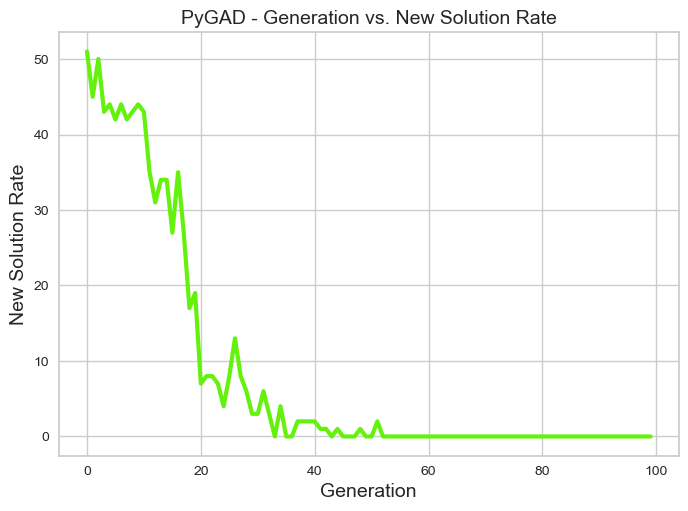

In [83]:
ga_instance_1.plot_new_solution_rate()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


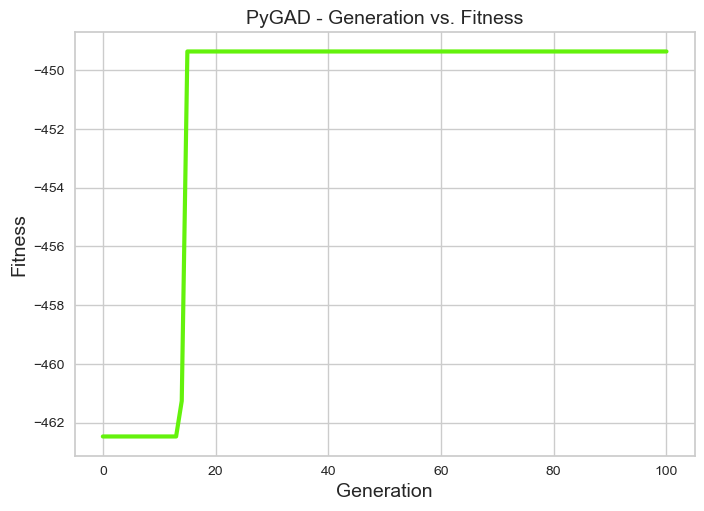

In [84]:
ga_instance_1.plot_fitness()
plt.show()

Algoritmo genetico 2

In [85]:
parent_2 = resultados_ordenados[1][0][0]
crossover_2 = resultados_ordenados[1][0][1]
mutation_2 = resultados_ordenados[1][0][2]

In [86]:
ga_instance_2 = pygad.GA(fitness_func=fitness_func,
                       num_generations=num_generations, 
                       num_parents_mating=num_parents_mating,
                       num_genes=num_genes,
                       parent_selection_type=parent_2,
                       crossover_type=crossover_2,
                       mutation_type= mutation_2,
                       mutation_percent_genes = mutation_percent_genes,
                       gene_space=gene_space,
                       mutation_probability=mutation_probability,
                       initial_population=poblacion_inicial,
                       gene_type=float,
                       on_stop=on_stop,
                       on_generation=on_generation,
                       save_solutions=True)
ga_instance_2.run()

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1162: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in

Generación 1: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 2: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 3: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 4: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 5: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 6: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 7: Mejor solucion = [ 3.3617013 25.        88.        84.       ] Mejor fitness = -446.00101088490044
Generación 8: Mejor solucion = [ 3.3617013 25.        88.        84.       ] Mejor fitness = -446.00101088490044
Generación 9: Mejor solucion = [ 3.3617013 25.        88.        84.    

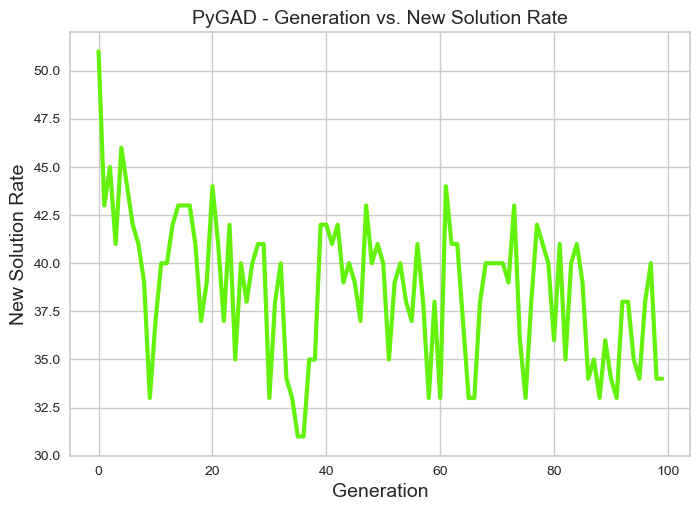

In [87]:
ga_instance_2.plot_new_solution_rate()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


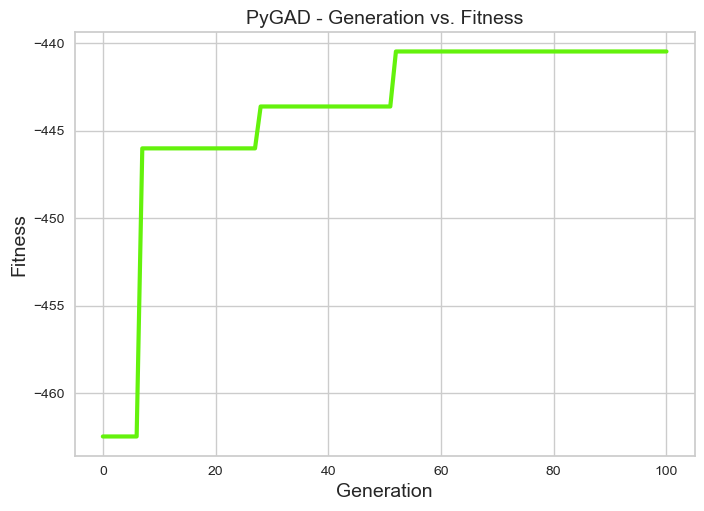

In [88]:
ga_instance_2.plot_fitness()
plt.show()

Algoritmo genetico 3

In [89]:
parent_3 = resultados_ordenados[2][0][0]
crossover_3 = resultados_ordenados[2][0][1]
mutation_3 = resultados_ordenados[2][0][2]

In [90]:
ga_instance_3 = pygad.GA(fitness_func=fitness_func,
                       num_generations=num_generations, 
                       num_parents_mating=num_parents_mating,
                       num_genes=num_genes,
                       parent_selection_type=parent_3,
                       crossover_type=crossover_3,
                       mutation_type= mutation_3,
                       mutation_percent_genes = mutation_percent_genes,
                       mutation_probability=mutation_probability,
                       gene_space=gene_space,
                       initial_population=poblacion_inicial,
                       gene_type=float,
                       on_stop=on_stop,
                       on_generation=on_generation,
                       save_solutions=True)
ga_instance_3.run()

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1162: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in

Generación 1: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 2: Mejor solucion = [87.60730299 24.74744191 84.26076741 10.92814345] Mejor fitness = -444.802703378447
Generación 3: Mejor solucion = [87.60730299 24.74744191 84.26076741 10.92814345] Mejor fitness = -444.802703378447
Generación 4: Mejor solucion = [87.60730299 24.74744191 84.26076741 10.92814345] Mejor fitness = -444.802703378447
Generación 5: Mejor solucion = [85.27850063  9.60775754 84.26076741 24.44162552] Mejor fitness = -436.27576338662226
Generación 6: Mejor solucion = [85.27850063  9.60775754 84.26076741 24.44162552] Mejor fitness = -436.27576338662226
Generación 7: Mejor solucion = [85.27850063  9.60775754 84.26076741 24.44162552] Mejor fitness = -436.27576338662226
Generación 8: Mejor solucion = [85.27850063  9.60775754 84.26076741 24.44162552] Mejor fitness = -436.27576338662226
Generación 9: Mejor solucion = [85.27850063  9.60775754 84.26076741 24

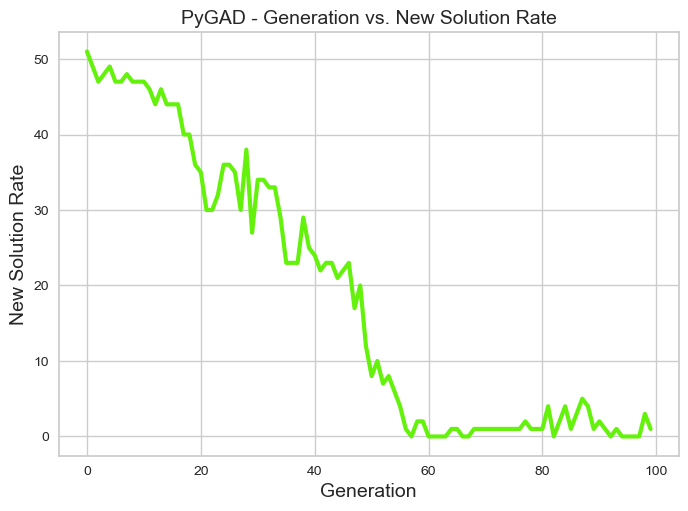

In [91]:
ga_instance_3.plot_new_solution_rate()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


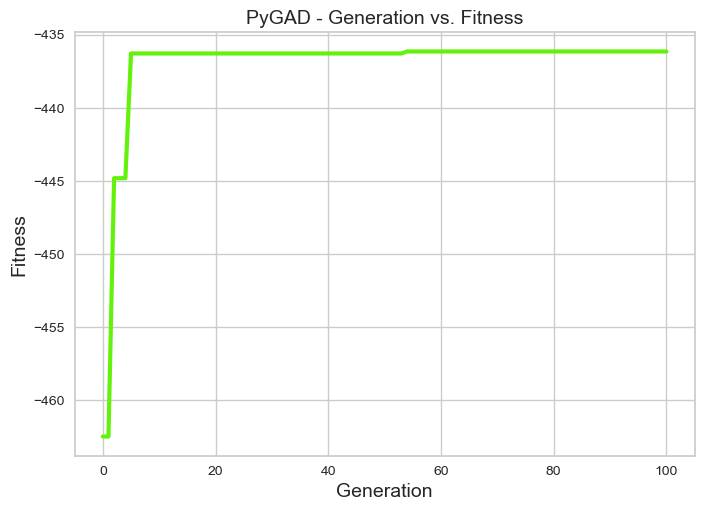

In [92]:
ga_instance_3.plot_fitness()
plt.show()

Algoritmo genetico 4

In [93]:
parent_4 = resultados_ordenados[3][0][0]
crossover_4 = resultados_ordenados[3][0][1]
mutation_4 = resultados_ordenados[3][0][2]

In [94]:
ga_instance_4 = pygad.GA(fitness_func=fitness_func,
                       num_generations=num_generations, 
                       num_parents_mating=num_parents_mating,
                       num_genes=num_genes,
                       parent_selection_type=parent_4,
                       crossover_type=crossover_4,
                       mutation_type= mutation_4,
                       mutation_percent_genes = mutation_percent_genes,
                       gene_space=gene_space,
                       mutation_probability=mutation_probability,
                       initial_population=poblacion_inicial,
                       gene_type=float,
                       on_stop=on_stop,
                       on_generation=on_generation,
                       save_solutions=True)
ga_instance_4.run()

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1162: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in

Generación 1: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 2: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.4622011899223
Generación 3: Mejor solucion = [82.39473549 57.86650504 43.         22.94984818] Mejor fitness = -461.79526200334465
Generación 4: Mejor solucion = [82.39473549 57.86650504 43.         22.94984818] Mejor fitness = -461.79526200334465
Generación 5: Mejor solucion = [82.39473549 57.86650504 43.         22.94984818] Mejor fitness = -461.79526200334465
Generación 6: Mejor solucion = [82.39473549 57.86650504 43.         22.94984818] Mejor fitness = -461.79526200334465
Generación 7: Mejor solucion = [82.39473549 57.86650504 43.         22.94984818] Mejor fitness = -461.79526200334465
Generación 8: Mejor solucion = [82.39473549 57.86650504 43.         22.94984818] Mejor fitness = -461.79526200334465
Generación 9: Mejor solucion = [82.39473549 57.86650504 43.       

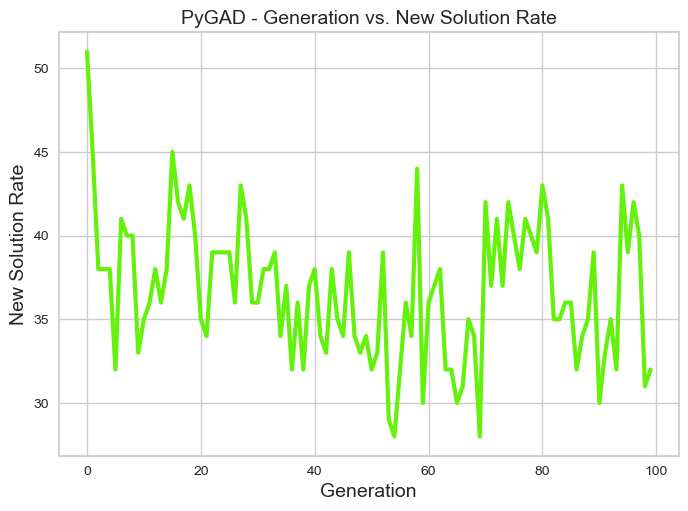

In [95]:
ga_instance_4.plot_new_solution_rate()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


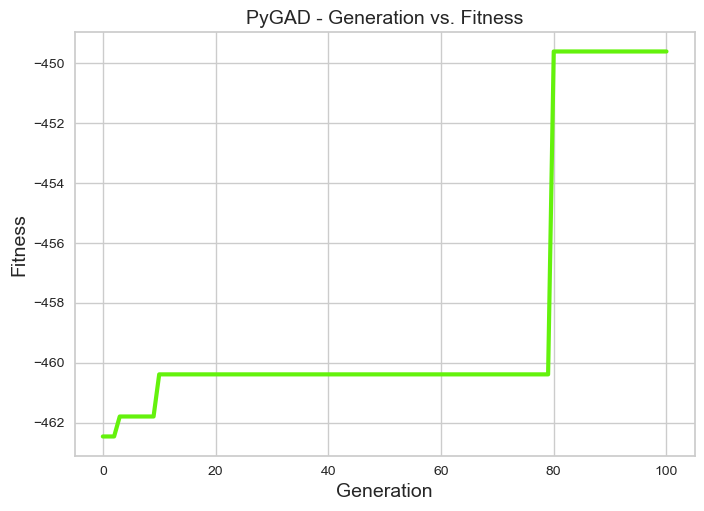

In [96]:
ga_instance_4.plot_fitness()
plt.show()

Algoritmo genetico 5

In [97]:
parent_5= resultados_ordenados[4][0][0]
crossover_5 = resultados_ordenados[4][0][1]
mutation_5 = resultados_ordenados[4][0][2]

In [98]:
ga_instance_5 = pygad.GA(fitness_func=fitness_func,
                       num_generations=num_generations, 
                       num_parents_mating=num_parents_mating,
                       num_genes=num_genes,
                       parent_selection_type=parent_5,
                       crossover_type=crossover_5,
                       mutation_type= mutation_5,
                       mutation_percent_genes = mutation_percent_genes,
                       mutation_probability=mutation_probability,
                       initial_population=poblacion_inicial,
                       gene_space=gene_space,
                       gene_type=float,
                       on_stop=on_stop,
                       on_generation=on_generation,
                       save_solutions=True)
ga_instance_5.run()

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1162: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in

Generación 1: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 2: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 3: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 4: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 5: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 6: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 7: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 8: Mejor solucion = [78.99671876 29.00633139 59.33404121 36.21123919] Mejor fitness = -462.46220118992227
Generación 9: Mejor solucion = [78.99671876 29.00633139 59.33404

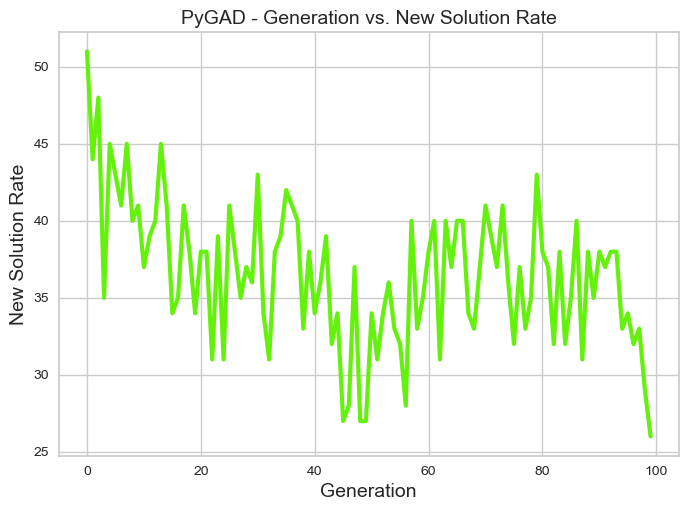

In [99]:
ga_instance_5.plot_new_solution_rate()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


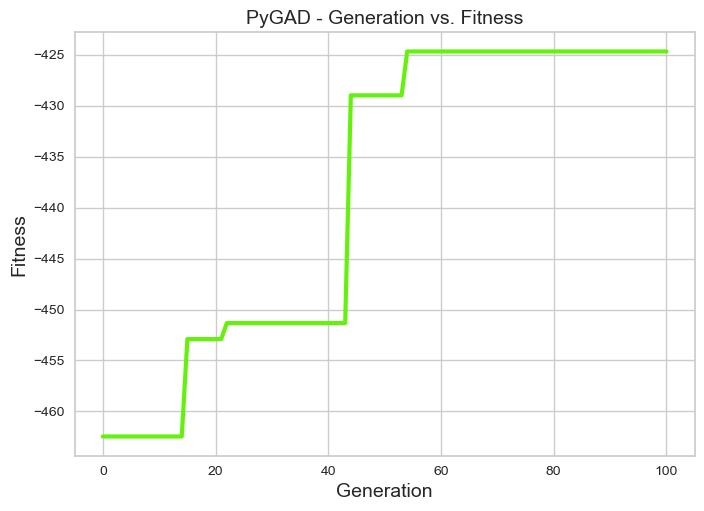

In [100]:
ga_instance_5.plot_fitness()
plt.show()

Probamos el 1 con otra consigna (el que converge mas rapido) (random, two points y swap)

In [33]:
objetivo = 180

In [34]:
ga_instance_1 = pygad.GA(fitness_func=fitness_func,
                       num_generations=100000, 
                       num_parents_mating=num_parents_mating,
                       num_genes=num_genes,
                       parent_selection_type=parent_1,
                       crossover_type=crossover_1,
                       mutation_type= mutation_1,
                       gene_space=gene_space,
                       mutation_percent_genes = mutation_percent_genes,
                       mutation_probability=mutation_probability,
                       initial_population=poblacion_inicial,
                       gene_type=float,
                       on_stop=on_stop,
                       on_generation=on_generation,
                       save_solutions=True,
                       stop_criteria="saturate_25")
ga_instance_1.run()

c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
c:\Users\HP\.conda\envs\reto06_progra\lib\site-packages\pygad\pygad.py:1162: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in

Generación 1: Mejor solucion = [79.20624713 75.01823211 28.36875716  6.15533982] Mejor fitness = -442.7031501313649
Generación 2: Mejor solucion = [79.20624713 75.01823211 28.36875716  6.15533982] Mejor fitness = -442.7031501313649
Generación 3: Mejor solucion = [79.20624713 75.01823211 28.36875716  6.15533982] Mejor fitness = -442.7031501313649
Generación 4: Mejor solucion = [79.20624713 75.01823211 28.36875716  6.15533982] Mejor fitness = -442.7031501313649
Generación 5: Mejor solucion = [79.20624713 75.01823211 28.36875716  6.15533982] Mejor fitness = -442.7031501313649
Generación 6: Mejor solucion = [79.20624713 75.01823211 28.36875716  6.15533982] Mejor fitness = -442.7031501313649
Generación 7: Mejor solucion = [82.2238777   8.7375561  28.36875716 57.95997863] Mejor fitness = -433.0062839625342
Generación 8: Mejor solucion = [82.2238777   8.7375561  28.36875716 57.95997863] Mejor fitness = -433.0062839625342
Generación 9: Mejor solucion = [82.2238777   8.7375561  28.36875716 57.9

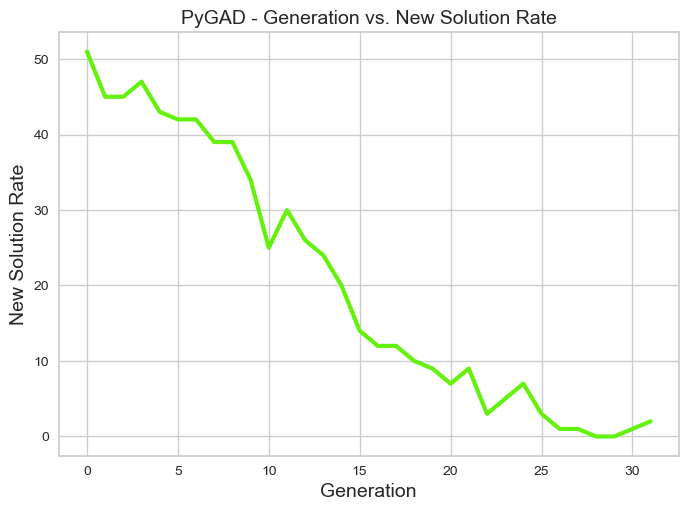

In [35]:
ga_instance_1.plot_new_solution_rate()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


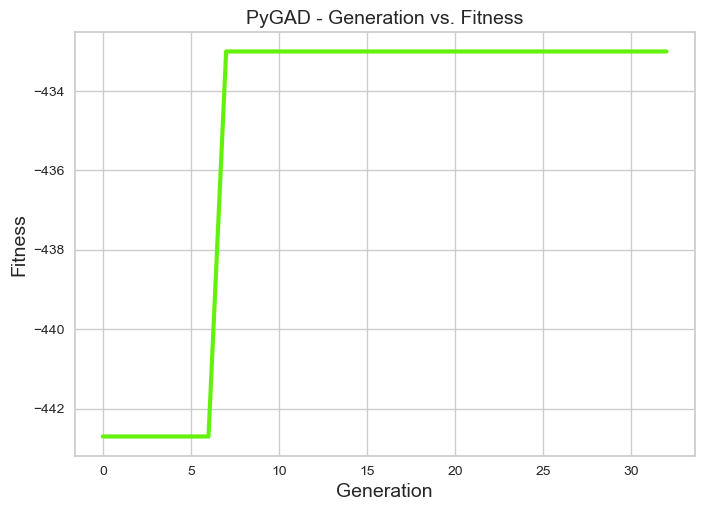

In [36]:
ga_instance_1.plot_fitness()
plt.show()